In [ ]:
import pandas as pd
import numpy as np
import math
from sympy import primerange, gcd
from sympy.ntheory import prime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numba import njit

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)


Condition 4.1
$$b_2^4\cdot q=a^2+p\cdot b_1^4$$

In [2]:
@njit
def condition_41_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_q = b2**4 * q
            rhs = b2_4_q - p * b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)


Condition 4.2
$$b_2^4\cdot p\cdot q=a^2+b_1^4$$

In [3]:
@njit
def condition_42_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_pq = b2**4 * p * q
            rhs = b2_4_pq - b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.3
$$b_2^4\cdot q=p\cdot b_1^4-a^2$$

In [4]:
@njit
def condition_43_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_q = b2**4 * q
            rhs = p * b1_4 - b2_4_q
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.4
$$b_2^4\cdot p\cdot q=b_1^4-a^2$$

In [5]:
@njit
def condition_44_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_pq = b2**4 * p * q
            rhs = b1_4 - b2_4_pq
            if rhs >= 0:
                # Use np.sqrt for compatibility with Numba
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Create a DataFrame with pairs of odd primes, where each row represents a unique pair $(𝑝,q)$ with $𝑝<𝑞$.

In [6]:
primes = primerange(3, 7000) #6000
prime_list=list(primes)
#prime_list.reverse()
l = len(prime_list)

p_values = []
q_values = []
for i in range(len(prime_list)):
    for j in range(i + 1, l):
        p_values.append(prime_list[i])
        q_values.append(prime_list[j])

df_primes = pd.DataFrame({"p": p_values, "q": q_values}, dtype=np.int32)

In [7]:
b1_max = 200
b2_max = 200
primes_b1 = np.array(list(primerange(1, 10**6))[:b1_max], dtype=np.int64)
primes_b2 = np.array(list(primerange(1, 10**6))[:b2_max], dtype=np.int64)

In [8]:
df_primes[['condition_41', 'condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes.apply(lambda row: pd.Series(condition_41_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_41'] = df_primes['condition_41'].astype(np.int8)
df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']].astype(pd.Int64Dtype())

In [9]:
df_primes[['condition_42', 'condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes.apply(lambda row: pd.Series(condition_42_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_42'] = df_primes['condition_42'].astype(np.int8)
df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']].astype(pd.Int64Dtype())

In [10]:
df_primes[['condition_43', 'condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes.apply(lambda row: pd.Series(condition_43_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_43'] = df_primes['condition_43'].astype(np.int8)
df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']].astype(pd.Int64Dtype())

In [11]:
df_primes[['condition_44', 'condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes.apply(lambda row: pd.Series(condition_44_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_44'] = df_primes['condition_44'].astype(np.int8)
df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']].astype(pd.Int64Dtype())

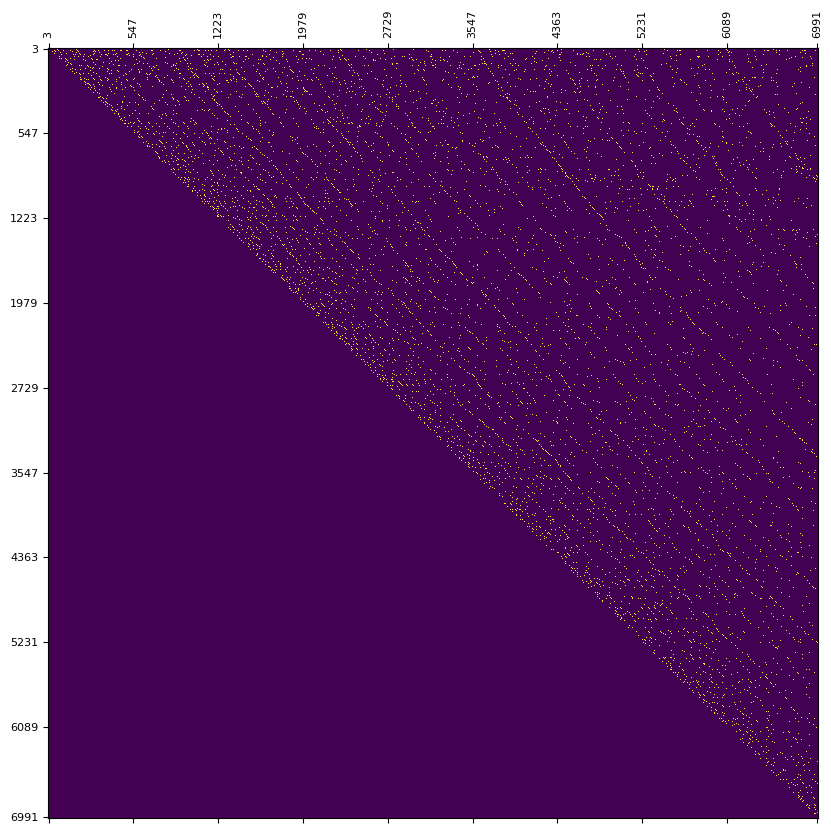

In [12]:
df_condition_met = df_primes[df_primes['condition_41'] == 1]

# Set up matrix indices for unique primes
# Combine unique values from 'p' and 'q' columns and sort them
# prime_index_map = {3: 0, 5: 1, 7: 2, 11: 3, 13: 4, 17: 5, 19: 6, 23: 7, 29: 8, ...}
unique_primes = sorted(set(df_primes['p'].unique()).union(set(df_primes['q'].unique())))
prime_index_map = {prime: idx for idx, prime in enumerate(unique_primes)}

# Initialize matrix with zeros
matrix_size = len(unique_primes)
matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Map indices
# p_indices = [  0   0   0 ... 159 161 161]
# q_indices = [  2   6  17 ... 164 162 164]
p_indices = df_condition_met['p'].map(prime_index_map).astype(int).to_numpy()
q_indices = df_condition_met['q'].map(prime_index_map).astype(int).to_numpy()

# Update matrix with valid indices only
matrix[p_indices, q_indices] = 1
#matrix[q_indices, p_indices] = 1

# Generate thinned labels for axis
max_prime = max(unique_primes)
axis_labels = list(enumerate(primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]  # Thin labels
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

# Plot with thinned labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, interpolation='nearest')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels, rotation=90, fontsize=8)
ax.set_yticklabels(ticklabels, fontsize=8)
plt.show()

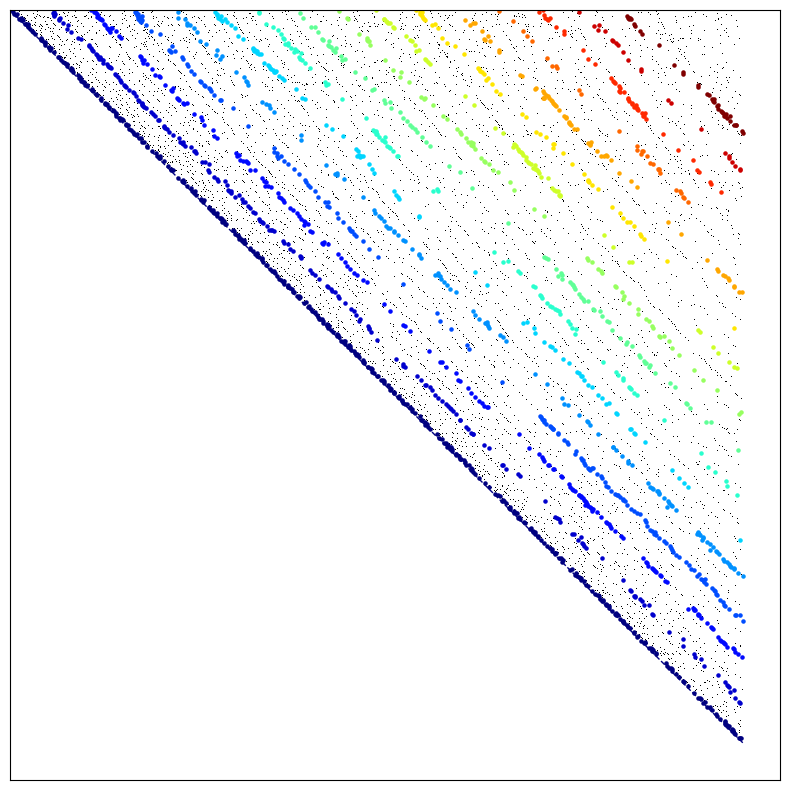

{0: [(0, 2),
  (2, 3),
  (4, 5),
  (4, 8),
  (6, 7),
  (9, 13),
  (10, 11),
  (10, 14),
  (12, 13),
  (12, 15),
  (17, 18),
  (17, 19),
  (17, 21),
  (19, 22),
  (20, 21),
  (23, 24),
  (25, 26),
  (27, 28),
  (29, 30),
  (34, 37),
  (35, 38),
  (36, 37),
  (36, 39),
  (39, 42),
  (40, 43),
  (42, 43),
  (45, 47),
  (46, 47),
  (46, 50),
  (48, 49),
  (51, 53),
  (57, 58),
  (57, 60),
  (61, 62),
  (63, 64),
  (65, 67),
  (66, 69),
  (68, 69),
  (71, 74),
  (72, 75),
  (73, 74),
  (76, 77),
  (79, 83),
  (82, 85),
  (83, 84),
  (84, 86),
  (86, 87),
  (88, 89),
  (88, 90),
  (91, 92),
  (91, 94),
  (93, 94),
  (96, 100),
  (98, 100),
  (99, 101),
  (103, 105),
  (104, 106),
  (108, 111),
  (110, 111),
  (113, 116),
  (115, 116),
  (115, 118),
  (119, 121),
  (120, 121),
  (122, 126),
  (123, 127),
  (126, 129),
  (127, 130),
  (129, 130),
  (132, 133),
  (132, 135),
  (133, 137),
  (134, 135),
  (135, 138),
  (139, 142),
  (141, 142),
  (141, 144),
  (145, 146),
  (147, 148),
  (149, 1

In [133]:
def extract_and_plot_lines(matrix, shift_values, threshold=3):
    """
    Extrahiert die Punktlisten für jede verschobene Linie y = x + shift und plottet sie.
    
    :param matrix: Die ursprüngliche Binärmatrix mit den Punkten.
    :param shift_values: Liste der Verschiebungswerte für die y=x Geraden.
    :param threshold: Maximaler Abstand, um Punkte als zur Linie zugehörig zu betrachten.
    :return: Dictionary mit shift-Werten als Keys und zugehörigen Punkten als Listen von (x, y)-Tupeln.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    # Extrahiere die Koordinaten der gesetzten Punkte und filtere nur obere Matrixhälfte (y <= x)
    points = np.column_stack(np.where(matrix == 1))
    points = points[points[:, 0] <= points[:, 1]]  # Nur obere Dreiecksmatrix

    # Dictionary zur Speicherung der Linienpunkte
    line_points_dict = {}

    # Farben für die Linien
    colors = plt.cm.jet(np.linspace(0, 1, len(shift_values)))

    for shift, color in zip(shift_values, colors):
        # Berechne den Abstand jedes Punktes zur Linie y = x + shift
        distances = np.abs(points[:, 0] - points[:, 1] + shift) / np.sqrt(2)

        # Wähle Punkte, die nahe genug an der verschobenen Linie liegen
        close_points = points[distances < threshold]

        # Speichere die Punkte für diese Linie
        line_points_dict[shift] = [tuple(point) for point in close_points]

        # Plotte diese Punkte in der Farbe der verschobenen Linie
        ax.scatter(close_points[:, 1], close_points[:, 0], color=color, s=5)

        # Zeichne die verschobene Gerade nur in der oberen Hälfte
        x_vals = np.linspace(0, matrix.shape[1], 100)
        y_vals = x_vals + shift
        valid_mask = y_vals <= x_vals  # Nur Werte in der oberen Hälfte
        ax.plot(x_vals[valid_mask], y_vals[valid_mask], color=color, linestyle='dashed', linewidth=1)

    # Achsenbeschriftungen entfernen
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.show()

    return line_points_dict

# Liste der Verschiebungen für die Geraden (z.B. von -50 bis +50 in 10er-Schritten)
shift_values = np.arange(0, 800, 50)

# Linien extrahieren und gleichzeitig plotten
line_points = extract_and_plot_lines(matrix, shift_values)

# Zeige die extrahierten Punktlisten an
line_points


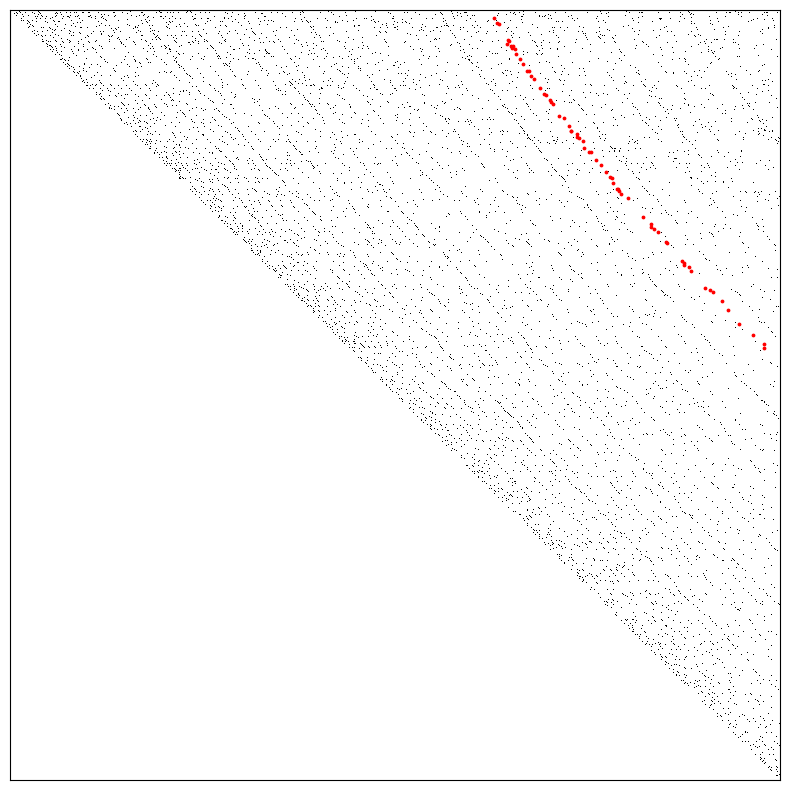

((2400, -1200),
 [(9, 565),
  (15, 568),
  (16, 570),
  (35, 581),
  (36, 582),
  (39, 580),
  (41, 584),
  (42, 587),
  (44, 586),
  (45, 589),
  (51, 590),
  (57, 595),
  (63, 598),
  (71, 603),
  (71, 605),
  (76, 608),
  (80, 611),
  (91, 618),
  (98, 623),
  (99, 625),
  (104, 630),
  (107, 631),
  (109, 633),
  (123, 641),
  (126, 646),
  (135, 652),
  (141, 654),
  (141, 655),
  (144, 662),
  (148, 661),
  (149, 664),
  (153, 668),
  (161, 670),
  (165, 676),
  (165, 678),
  (175, 684),
  (181, 689),
  (189, 695),
  (195, 700),
  (196, 702),
  (201, 704),
  (208, 708),
  (209, 709),
  (211, 710),
  (214, 713),
  (219, 721),
  (241, 738),
  (249, 748),
  (253, 748),
  (255, 751),
  (259, 756),
  (270, 765),
  (271, 766),
  (293, 784),
  (295, 787),
  (297, 786),
  (299, 792),
  (304, 795),
  (324, 811),
  (326, 817),
  (329, 820),
  (339, 831),
  (350, 838),
  (366, 851),
  (379, 867),
  (390, 880),
  (394, 880)])

In [196]:
def extract_and_plot_custom_circular_arc(matrix, x0, y0, fixed_radius, threshold=3):
    """
    Markiert Punkte, die am nächsten zum Kreis mit einem festen Mittelpunkt (x0, y0) und einem festen Radius liegen.

    :param matrix: Die ursprüngliche Binärmatrix mit den Punkten.
    :param x0: Vorgegebener x-Wert für den Mittelpunkt.
    :param y0: Vorgegebener y-Wert für den Mittelpunkt.
    :param fixed_radius: Fester Radius des Kreises.
    :param threshold: Maximaler Abstand, um Punkte als zum Kreisbogen zugehörig zu betrachten.
    :return: Liste der Punkte, die dem Kreisbogen am nächsten liegen, und den verwendeten Mittelpunkt.
    """
    fixed_center = (x0, y0)  # Vorgegebener Mittelpunkt

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.matshow(matrix, interpolation='nearest', cmap="Greys")

    # Extrahiere die Koordinaten der gesetzten Punkte
    points = np.column_stack(np.where(matrix == 1))

    # Berechne den Abstand jedes Punktes zum Kreis
    distances = np.abs(np.sqrt((points[:, 1] - fixed_center[0]) ** 2 + (points[:, 0] - fixed_center[1]) ** 2) - fixed_radius)

    # Wähle Punkte, die nahe genug am Kreisbogen liegen und innerhalb der Matrix bleiben
    close_points = points[(distances < threshold) &
                          (points[:, 0] >= 0) & (points[:, 0] < matrix.shape[0]) &
                          (points[:, 1] >= 0) & (points[:, 1] < matrix.shape[1])]

    # Plotte diese Punkte in Farbe
    ax.scatter(close_points[:, 1], close_points[:, 0], color="red", s=3)

    # Zeichne den Kreisbogen
    theta = np.linspace(-np.pi / 2, np.pi / 2, 100)  # Nur obere Hälfte des Kreises
    x_arc = fixed_center[0] + fixed_radius * np.cos(theta)
    y_arc = fixed_center[1] + fixed_radius * np.sin(theta)

    # Nur Punkte innerhalb der Matrix plotten
    mask = (x_arc >= 0) & (x_arc < matrix.shape[1]) & (y_arc >= 0) & (y_arc < matrix.shape[0])
    ax.plot(x_arc[mask], y_arc[mask], color="red", linestyle='dashed', linewidth=0.5)

    # Achsenbeschriftungen entfernen
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    return [tuple(point) for point in close_points], fixed_center

# Setze die gewünschten Werte für den Mittelpunkt und den Radius
x0 = 2400  # Beispielwert für den Mittelpunkt x0
y0 = -1200  # Beispielwert für den Mittelpunkt y0
fixed_radius = 2200  # Beispielradius

# Extrahiere und plotte den Kreisbogen mit den vorgegebenen Werten
arc_points_custom, computed_center_custom = extract_and_plot_custom_circular_arc(matrix, x0, y0, fixed_radius)

# Zeige die berechneten Werte für den Mittelpunkt und die Liste der gefärbten Punkte
computed_center_custom, arc_points_custom
